# MLB Pitcher Analysis

## Modeling

### Called Strikes Model

## Project Goals:

- Determine why Pitcher 1 struggled after the all-star break.
- Determine why Pitchers 2 and 3 improved after the all-star break.
- For each pitcher, build a predictive model of called strikes to use for improving pitching performance.

## Summary of Data:

The data for this study contains all pitches that were taken by a batter (i.e., ball or called strike) when thrown by one of three pitchers. Pitcher’s 1, 2, and 3 are all considered elite, high-value players across the league. In the 2019 season, Pitcher 1 had an earned run average (ERA) of 2.30 before the all-star break, followed by an ERA of 4.80 after the all-star break. Pitchers 2 and 3 posted ERA's of 3.10 and 3.30, respectively, before the all-star break. After the all-star break, Pitchers 2 and 3 posted ERA's of 1.80 and 1.44 respectively. This data was used to provide exploratory data analysis for all three pitchers and provide initial findings for the project goals listed above. The initial findings were used as a guide to build a predictive model of called strikes for each pitcher. Called strikes was identified as the response variable that could lead to improved pitching performance over the course of the baseball season (without the use of hit, strikeout, or walk data).

In [1]:
#import and run libraries and cleaned data from mlb_pitcher_analysis_data_cleaning notebook
%run ../../python_files/mlb_pitcher_analysis_libraries
%run ../../python_files/mlb_pitcher_analysis_data_cleaning
%matplotlib inline
sns.set(style="whitegrid")
pd.options.display.max_columns = 100
# from mlb_pitcher_analysis_libraries import *    #for use within .py file

## Modeling Strategies

##### Pre-Modeling Techniques

- Scaling: We use Standard Scaler to scale our 'x' training and test datasets so that our model does not unfairly penalize our coefficients due to differences in units.

##### Model Implementation and Model Performance

We utilized a pipeline technique to implement 8 different model types for each player (3 pipelines- 1 for each player, 24 total models):

- Logistic Regression
- KNN
- SVC
- NuSVC
- Decision Tree
- Random Forest
- Ada Boost
- Gradient Boosting

After running each pipeline, we will be able to review model performance using accuracy as our primary metric. We will also review confusion matrices to review correct predictions vs incorrect predictions.

## Pitcher 1: Called Strikes Model

In [2]:
# Pitcher 1 Called Strike Training Model Selection and Comparison

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher1, y_train_pitcher1)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_train_pitcher1, pipe.predict(x_train_pitcher1)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_train_pitcher1, y_train_pitcher1), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,616,125
actual 1,224,182


Accuracy Score:  0.6957279860505667
Model Score: 0.696 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,632,109
actual 1,96,310


Accuracy Score:  0.8212728857890148
Model Score: 0.821 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,693,48
actual 1,131,275


Accuracy Score:  0.8439407149084568
Model Score: 0.844 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,697,44
actual 1,47,359


Accuracy Score:  0.9206625980819529
Model Score: 0.921 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,741,0
actual 1,0,406


Accuracy Score:  1.0
Model Score: 1.000 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,741,0
actual 1,0,406


Accuracy Score:  1.0
Model Score: 1.000 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,714,27
actual 1,19,387


Accuracy Score:  0.959895379250218
Model Score: 0.960 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,728,13
actual 1,9,397


Accuracy Score:  0.980819529206626
Model Score: 0.981 



In [3]:
# Pitcher 1 Called Strike Test Model Selection and Comparison

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher1, y_train_pitcher1)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_pitcher1, pipe.predict(x_test_pitcher1)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_test_pitcher1, y_test_pitcher1), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,161,34
actual 1,45,47


Accuracy Score:  0.7247386759581882
Model Score: 0.725 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,136,59
actual 1,30,62


Accuracy Score:  0.6898954703832753
Model Score: 0.690 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,167,28
actual 1,38,54


Accuracy Score:  0.7700348432055749
Model Score: 0.770 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,161,34
actual 1,24,68


Accuracy Score:  0.7979094076655052
Model Score: 0.798 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,170,25
actual 1,15,77


Accuracy Score:  0.8606271777003485
Model Score: 0.861 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,179,16
actual 1,20,72


Accuracy Score:  0.8745644599303136
Model Score: 0.875 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,177,18
actual 1,14,78


Accuracy Score:  0.8885017421602788
Model Score: 0.889 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,176,19
actual 1,14,78


Accuracy Score:  0.8850174216027874
Model Score: 0.885 



## Pitcher 1 Best Model

### Our *Ada Boost Model* had the best model performance.

#### Further analysis of this model will help us determine how effective our model is in predicting called strikes for pitchers.

##### Model Implementation

In [4]:
# re-run our Pitcher 1 Called Strike Ada Boost model for further review of model performance

classifier_adaboost = [AdaBoostClassifier()]

for classifier in classifier_adaboost:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher1, y_train_pitcher1)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_pitcher1, pipe.predict(x_test_pitcher1)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_test_pitcher1, y_test_pitcher1), '\n')

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,177,18
actual 1,14,78


Accuracy Score:  0.8885017421602788
Model Score: 0.889 



##### Accuracy Calculation

Through the above calculation of accuracy, approximately 89% of the variability in called strikes can be explained using our feature variables, which is promising for our first run of this model.

##### Confusion Matrix Results

The above confusion matrix results are telling us that out of 287 total predictions, we have 255 correct predictions (78 true positives + 177 true negatives = 255 correct predictions) and 32 incorrect predictions (18 false positives + 14 false negatives = 32 incorrect predictions). The ratio of approximately 8 correct predictions to every 1 incorrect prediction is also a good sign for our first run of this model. Ideally, we would like to see more true positives (called strikes) though.

##### ROC Curve

The below ROC Curve is also promising due to the strong true positive rate.

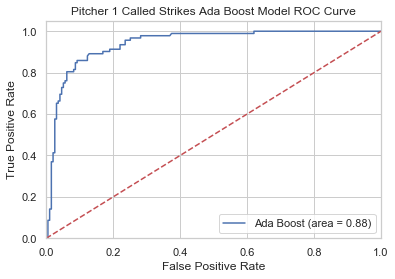

In [5]:
# ROC Curve for our Pitcher 1 Called Strike Ada Boost model for further review of model performance

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train_pitcher1, y_train_pitcher1)

adaboost_roc_auc = roc_auc_score(y_test_pitcher1, adaboost_model.predict(x_test_pitcher1))
fpr, tpr, thresholds = roc_curve(y_test_pitcher1, adaboost_model.predict_proba(x_test_pitcher1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % adaboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Pitcher 1 Called Strikes Ada Boost Model ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Which Pitcher 1 pitching variables are most important in predicting called strikes?

### We use our *Logistic Regression model* to answer this question.

#### Further analysis of this model will help determine which pitching variables are most important in predicting called strikes.

##### Model Implementation

Through the review of our logistic regression model results, we can use the coefficient values of our feature variables to identify which pitching variables are most important in predicting called strikes.

In [6]:
# re-run our Pitcher 1 Called Strike Logistic Regression model for further review of feature performance

logit_model = sm.Logit(y_train_pitcher1.astype(int), x_train_pitcher1.astype(int))
logit_result = logit_model.fit()
print(logit_result.summary())

         Current function value: 0.565413
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          result_strike   No. Observations:                 1147
Model:                          Logit   Df Residuals:                     1124
Method:                           MLE   Df Model:                           22
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1300
Time:                        15:11:02   Log-Likelihood:                -648.53
converged:                      False   LL-Null:                       -745.40
Covariance Type:            nonrobust   LLR p-value:                 1.902e-29
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
x                       -0.0058      0.006     -0.897      0.370      -0.019       0.007
z                        0.0086    

/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Evaluation of Model Coefficients

After running our logistic regression model, we can see which feature variables have an impact on called strikes. It is clear that pitch selection (the pitch type thrown) is the most statistically significant, implying that pitch selection has the strongest influence on called strikes. The specific pitch out of the 5 pitches Pitcher 1 throws was his Changeup, indicating that the use of his Changeup is the pitch with the highest influence on called strikes. The next most significant feature variable is horizontal release point (release_x). The p-values of many of these variables are very concerning though and this model likely needs some adjusting.

## Pitcher 2: Called Strikes Model

In [7]:
# Pitcher 2 Called Strike Training Model Selection and Comparison

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher2, y_train_pitcher2)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_train_pitcher2, pipe.predict(x_train_pitcher2)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_train_pitcher2, y_train_pitcher2), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,810,139
actual 1,374,159


Accuracy Score:  0.6538461538461539
Model Score: 0.654 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,802,147
actual 1,123,410


Accuracy Score:  0.8178137651821862
Model Score: 0.818 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,855,94
actual 1,138,395


Accuracy Score:  0.8434547908232118
Model Score: 0.843 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,882,67
actual 1,34,499


Accuracy Score:  0.9318488529014844
Model Score: 0.932 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,949,0
actual 1,0,533


Accuracy Score:  1.0
Model Score: 1.000 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,949,0
actual 1,0,533


Accuracy Score:  1.0
Model Score: 1.000 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,908,41
actual 1,31,502


Accuracy Score:  0.951417004048583
Model Score: 0.951 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,922,27
actual 1,17,516


Accuracy Score:  0.970310391363023
Model Score: 0.970 



In [8]:
# Pitcher 2 Called Strike Test Model Selection and Comparison

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher2, y_train_pitcher2)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_pitcher2, pipe.predict(x_test_pitcher2)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_test_pitcher2, y_test_pitcher2), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,222,24
actual 1,78,47


Accuracy Score:  0.7250673854447439
Model Score: 0.725 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,175,71
actual 1,39,86


Accuracy Score:  0.7035040431266847
Model Score: 0.704 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,222,24
actual 1,43,82


Accuracy Score:  0.8194070080862533
Model Score: 0.819 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,222,24
actual 1,32,93


Accuracy Score:  0.8490566037735849
Model Score: 0.849 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,230,16
actual 1,19,106


Accuracy Score:  0.9056603773584906
Model Score: 0.906 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,234,12
actual 1,21,104


Accuracy Score:  0.9110512129380054
Model Score: 0.911 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,227,19
actual 1,13,112


Accuracy Score:  0.9137466307277629
Model Score: 0.914 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,231,15
actual 1,13,112


Accuracy Score:  0.9245283018867925
Model Score: 0.925 



## Pitcher 2 Best Model

### Our *Gradient Boosting Model* had the best model performance.

#### Further analysis of this model will help us determine how effective our model is in predicting called strikes for pitchers.

##### Model Implementation

In [9]:
# re-run our Pitcher 2 Called Strike Gradient Boosting model for further review of model performance

classifier_gradientboosting = [GradientBoostingClassifier()]

for classifier in classifier_gradientboosting:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher2, y_train_pitcher2)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_pitcher2, pipe.predict(x_test_pitcher2)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_test_pitcher2, y_test_pitcher2), '\n')

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,231,15
actual 1,13,112


Accuracy Score:  0.9245283018867925
Model Score: 0.925 



##### Accuracy Calculation

Through the above calculation of accuracy, approximately 92% of the variability in called strikes can be explained using our feature variables, which is promising for our first run of this model.

##### Confusion Matrix Results

The above confusion matrix results are telling us that out of 371 total predictions, we have 343 correct predictions (112 true positives + 231 true negatives = 343 correct predictions) and 28 incorrect predictions (15 false positives + 13 false negatives = 28 incorrect predictions). The ratio of approximately 12 correct predictions to every 1 incorrect prediction is also a good sign for our first run of this model. Ideally, we would like to see more true positives (called strikes) though.

##### ROC Curve

The below ROC Curve is also promising due to the strong true positive rate.

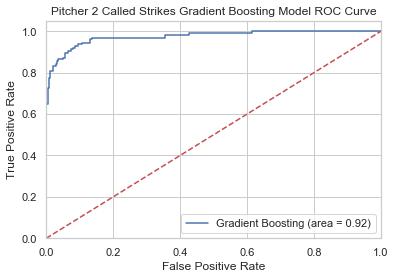

In [10]:
# ROC Curve our Pitcher 2 Called Strike Gradient Boosting model for further review of model performance

gradientboosting_model = GradientBoostingClassifier()
gradientboosting_model.fit(x_train_pitcher2, y_train_pitcher2)

gradientboosting_roc_auc = roc_auc_score(y_test_pitcher2, gradientboosting_model.predict(x_test_pitcher2))
fpr, tpr, thresholds = roc_curve(y_test_pitcher2, gradientboosting_model.predict_proba(x_test_pitcher2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gradientboosting_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Pitcher 2 Called Strikes Gradient Boosting Model ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Which Pitcher 2 pitching variables are most important in predicting called strikes?

### We use our *Logistic Regression model* to answer this question.

#### Further analysis of this model will help determine which pitching variables are most important in predicting more called strikes.

##### Model Implementation

Through the review of our logistic regression model results, we can use the coefficient values of our feature variables to identify which pitching variables are most important in predicting called strikes.

In [11]:
# re-run our Pitcher 2 Called Strike Logistic Regression model for further review of feature performance

logit_model = sm.Logit(y_train_pitcher2.astype(float), x_train_pitcher2.astype(float))
logit_result = logit_model.fit()
print(logit_result.summary())

         Current function value: 21.027408
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          result_strike   No. Observations:                 1482
Model:                          Logit   Df Residuals:                     1459
Method:                           MLE   Df Model:                           22
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  -31.19
Time:                        15:11:15   Log-Likelihood:                -31163.
converged:                      False   LL-Null:                       -968.07
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
x                       -1.3589      0.294     -4.625      0.000      -1.935      -0.783
z                       -0.8625   

/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Evaluation of Model Coefficients

After running our logistic regression model, we can see which feature variables have an impact on called strikes. It is clear that pitch selection (the pitch type thrown) is the most statistically significant, implying that pitch selection has the strongest influence on called strikes. The next most significant feature variable is horizontal release point (release_x). Ball-strike counts and baserunners seems to also display high significance. The p-values of many of these variables are very concerning though and this model likely needs some adjusting.

## Pitcher 3: Called Strikes Model

In [12]:
# Pitcher 3 Called Strike Training Model Selection and Comparison

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher3, y_train_pitcher3)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_train_pitcher3, pipe.predict(x_train_pitcher3)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_train_pitcher3, y_train_pitcher3), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,671,68
actual 1,235,102


Accuracy Score:  0.7184014869888475
Model Score: 0.718 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,644,95
actual 1,116,221


Accuracy Score:  0.8039033457249071
Model Score: 0.804 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,699,40
actual 1,160,177


Accuracy Score:  0.8141263940520446
Model Score: 0.814 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,698,41
actual 1,57,280


Accuracy Score:  0.9089219330855018
Model Score: 0.909 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,739,0
actual 1,0,337


Accuracy Score:  1.0
Model Score: 1.000 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,739,0
actual 1,0,337


Accuracy Score:  1.0
Model Score: 1.000 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,701,38
actual 1,26,311


Accuracy Score:  0.9405204460966543
Model Score: 0.941 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,724,15
actual 1,12,325


Accuracy Score:  0.974907063197026
Model Score: 0.975 



In [13]:
# Pitcher 3 Called Strike Test Model Selection and Comparison

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher3, y_train_pitcher3)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_pitcher3, pipe.predict(x_test_pitcher3)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_test_pitcher3, y_test_pitcher3), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,171,20
actual 1,66,13


Accuracy Score:  0.6814814814814815
Model Score: 0.681 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,153,38
actual 1,47,32


Accuracy Score:  0.6851851851851852
Model Score: 0.685 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,172,19
actual 1,54,25


Accuracy Score:  0.7296296296296296
Model Score: 0.730 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,167,24
actual 1,37,42


Accuracy Score:  0.774074074074074
Model Score: 0.774 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,174,17
actual 1,17,62


Accuracy Score:  0.8740740740740741
Model Score: 0.874 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,184,7
actual 1,20,59


Accuracy Score:  0.9
Model Score: 0.900 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,174,17
actual 1,9,70


Accuracy Score:  0.9037037037037037
Model Score: 0.904 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,183,8
actual 1,10,69


Accuracy Score:  0.9333333333333333
Model Score: 0.933 



## Pitcher 3 Best Model

### Our *Gradient Boosting Model* had the best model performance.

#### Further analysis of this model will help us determine how effective our model is in predicting called strikes for pitchers.

##### Model Implementation

In [14]:
# re-run our Pitcher 3 Called Strike Gradient Boosting model for further review of model performance

classifier_gradientboosting = [GradientBoostingClassifier()]

for classifier in classifier_gradientboosting:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_pitcher3, y_train_pitcher3)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_pitcher3, pipe.predict(x_test_pitcher3)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Accuracy Score: ",(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,0])/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0]+conf_matrix.iloc[0,0]))
    print("Model Score: %.3f" % pipe.score(x_test_pitcher3, y_test_pitcher3), '\n')

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,183,8
actual 1,10,69


Accuracy Score:  0.9333333333333333
Model Score: 0.933 



##### Accuracy Calculation

Through the above calculation of accuracy, approximately 93% of the variability in 'draft_status' can be explained using our feature variables, which is promising for our first run of this model.

##### Confusion Matrix Results

The above confusion matrix results are telling us that out of 270 total predictions, we have 252 correct predictions (69 true positives + 183 true negatives = 252 correct predictions) and 18 incorrect predictions (8 false positives + 10 false negatives = 18 incorrect predictions). The ratio of approximately 14 correct predictions to every 1 incorrect prediction is also a good sign for our first run of this model. Ideally, we would like to see more true positives (called strikes) though.

##### ROC Curve

The below ROC Curve is also promising due to the strong true positive rate.

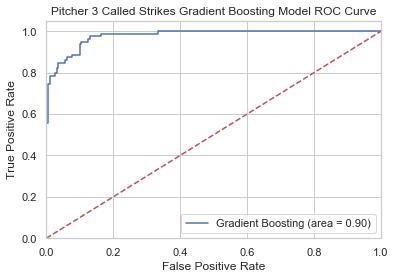

In [15]:
# ROC Curve our Pitcher 3 Called Strike Gradient Boosting model for further review of model performance

gradientboosting_model = GradientBoostingClassifier()
gradientboosting_model.fit(x_train_pitcher3, y_train_pitcher3)

gradientboosting_roc_auc = roc_auc_score(y_test_pitcher3, gradientboosting_model.predict(x_test_pitcher3))
fpr, tpr, thresholds = roc_curve(y_test_pitcher3, gradientboosting_model.predict_proba(x_test_pitcher3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gradientboosting_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Pitcher 3 Called Strikes Gradient Boosting Model ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Which Pitcher 3 pitching variables are most important in predicting called strikes?

### We use our *Logistic Regression model* to answer this question.

#### Further analysis of this model will help determine which pitching variables are most important in predicting more called strikes.

##### Model Implementation

Through the review of our logistic regression model results, we can use the coefficient values of our feature variables to identify which pitching variables are most important in predicting called strikes.

In [16]:
# re-run our Pitcher 3 Called Strike Logistic Regression model for further review of feature performance

logit_model = sm.Logit(y_train_pitcher3.astype(int), x_train_pitcher3.astype(int))
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.546700
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          result_strike   No. Observations:                 1076
Model:                          Logit   Df Residuals:                     1054
Method:                           MLE   Df Model:                           21
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1205
Time:                        15:11:23   Log-Likelihood:                -588.25
converged:                       True   LL-Null:                       -668.88
Covariance Type:            nonrobust   LLR p-value:                 1.241e-23
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
x                       -0.0132      0.008     -1.686      0.092      -0.029       0.002

##### Evaluation of Model Coefficients

After running our logistic regression model, we can see which feature variables have an impact on called strikes. It is clear that spin rate p is the most statistically significant, implying that spin rate has the strongest influence on called strikes. The next most significant feature variables are pitch selection (the pitch type thrown) and vertical release point (release_z). The specific pitch out of the 5 pitches Pitcher 3 throws was his Curveball, indicating that the use of his Curveball is the pitch with the highest influence on called strikes. The p-values of many of these variables are very concerning though and this model likely needs some adjusting.